# **Implementación de un modelo desarrollado en Tensorflow de visión artificial**

En este proyecto se desarrollá el código necesario para implementar un modelo de visión artificial creado utilizando el framework Tensorflow.

In [ ]:
#Loading the saved_model
import tensorflow as tf
import time
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from PIL import Image
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils

C:\Users\equipo\Anaconda3\envs\proyecto\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\equipo\Anaconda3\envs\proyecto\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
C:\Users\equipo\Anaconda3\envs\proyecto\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [ ]:
#IMAGE_SIZE = (6, 4) # Output display size as you want
IMAGE_SIZE = (2, 1) # Output display size as you want
import matplotlib.pyplot as plt
PATH_TO_SAVED_MODEL= r'C:\Users\equipo\modelos\exported-models\ssd_mobnet_v2_fpnlite\saved_model'
print('Loading model...', end='')

# Load saved model and build the detection function
detect_fn=tf.saved_model.load(PATH_TO_SAVED_MODEL)
print('Done!')

Loading model...Done!


In [ ]:
#Loading the label_map
category_index=label_map_util.create_category_index_from_labelmap(r'C:\Users\equipo\modelos\annotations\label_map.pbtxt',use_display_name=True)
#category_index=label_map_util.create_category_index_from_labelmap([path_to_label_map],use_display_name=True)

In [ ]:
def load_image_into_numpy_array(path):

    return np.array(Image.open(path))

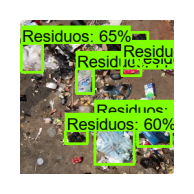

In [ ]:
def load_image_into_numpy_array(path):

    return np.array(Image.open(path))

#image_path = r'C:\Users\equipo\Documents\crhistian\Proyecto\Dataset_Final\test\170611imagen_780.jpg'
#image_path = r'C:\Users\equipo\Documents\crhistian\Proyecto\Dataset_Final\test\170612imagen_450.jpg'
#image_path = r'C:\Users\equipo\Documents\crhistian\Proyecto\Dataset_Final\test\180510imagen_510.jpg'
#image_path = r'C:\Users\equipo\Documents\crhistian\Proyecto\Dataset_Final\test\180510imagen_1140.jpg'
#image_path = r'C:\Users\equipo\Documents\crhistian\Proyecto\Dataset_Final\test\180511imagen_90.jpg'
#image_path = r'C:\Users\equipo\modelos\images\test\20230831_170443.jpg'
image_path = r'C:\Users\equipo\Documents\crhistian\Proyecto\Dataset_Final\test\042716imagen_1110.jpg'
#print('Running inference for {}... '.format(image_path), end='')

image_np = load_image_into_numpy_array(image_path)

# The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
input_tensor = tf.convert_to_tensor(image_np)
# The model expects a batch of images, so add an axis with `tf.newaxis`.
input_tensor = input_tensor[tf.newaxis, ...]

detections = detect_fn(input_tensor)

# All outputs are batches tensors.
# Convert to numpy arrays, and take index [0] to remove the batch dimension.
# We're only interested in the first num_detections.
num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
      image_np_with_detections,
      detections['detection_boxes'],
      detections['detection_classes'],
      detections['detection_scores'],
      category_index,
      use_normalized_coordinates=True,
      max_boxes_to_draw=200,
      min_score_thresh=.4, # Adjust this value to set the minimum probability boxes to be classified as True
      agnostic_mode=False)
%matplotlib inline
plt.figure(figsize=IMAGE_SIZE, dpi=200)
plt.axis("off")
plt.imshow(image_np_with_detections)
plt.show()